In [1]:
#ダミー変数化は不要っぽい
#正解データ = MPG,燃費?

In [31]:
from pandas.errors import InvalidIndexError
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [34]:
#読み込み
df2 = pd.read_csv('auto_mgp.csv')
df2

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,393,27.0,4,140.0,86.0,2790,15.6,82,1
394,394,44.0,4,97.0,52.0,2130,24.6,82,2
395,395,32.0,4,135.0,84.0,2295,11.6,82,1
396,396,28.0,4,120.0,79.0,2625,18.6,82,1


In [37]:
train_val,test = train_test_split(df2,test_size = 0.2,
                                  random_state = 0)

In [38]:
train_val.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      5
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [39]:
train_val_mean = train_val.mean()
train_val2=train_val.fillna(train_val_mean)


In [40]:
#欠損値の確認
train_val2.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

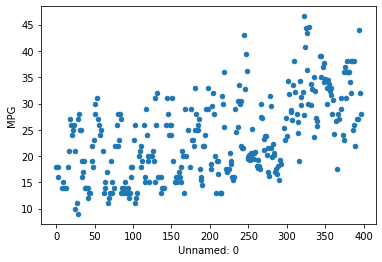

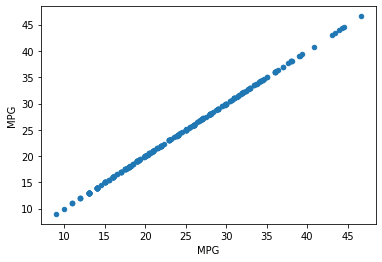

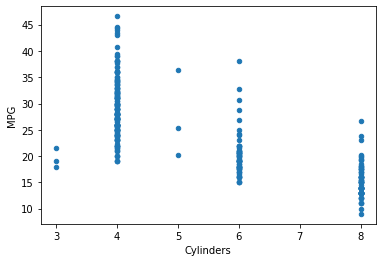

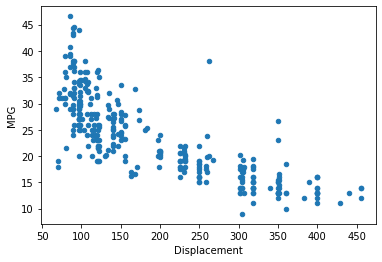

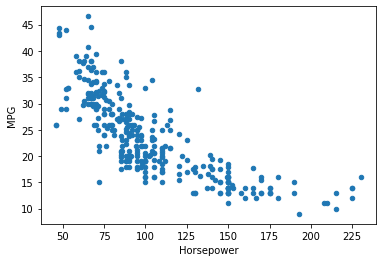

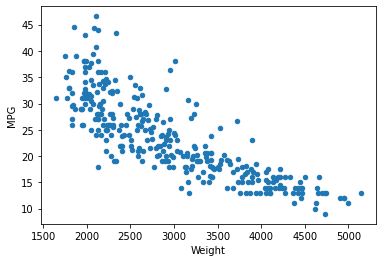

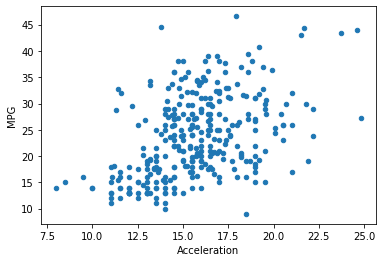

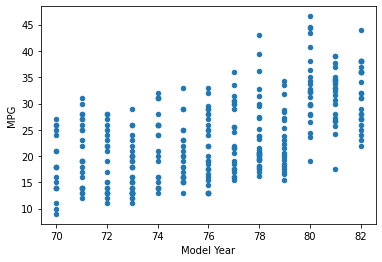

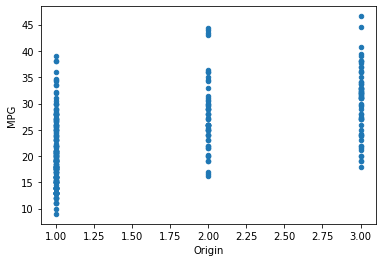

In [42]:
#散布図を描写して外れ値を探す
colname = train_val2.columns
for name in colname:
  train_val2.plot(kind = 'scatter',x = name,y = 'MPG')

In [49]:
#外れ値のあるインデックスを確認
out_line1 = train_val2[(train_val2['MPG'] > 35) &
                       (train_val2['Displacement'] > 250)].index
print(out_line1)

Int64Index([387], dtype='int64')


In [50]:
train_val3 =train_val2.drop([387],axis = 0)

外れ値削除


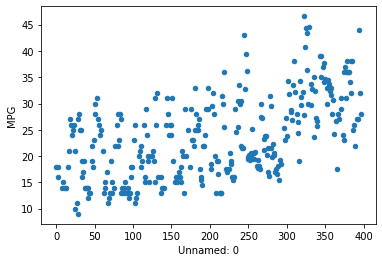

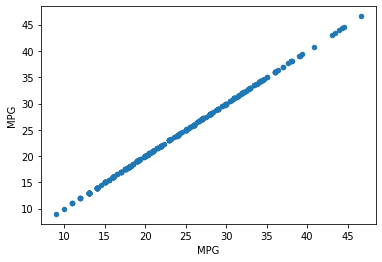

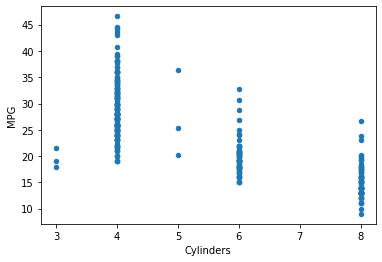

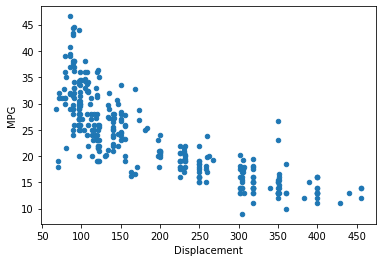

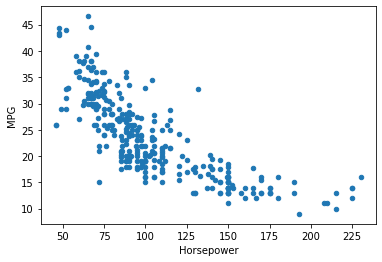

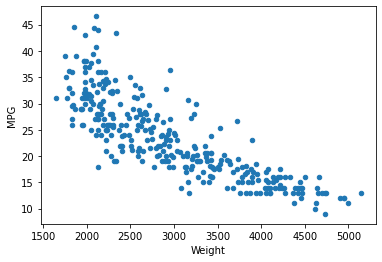

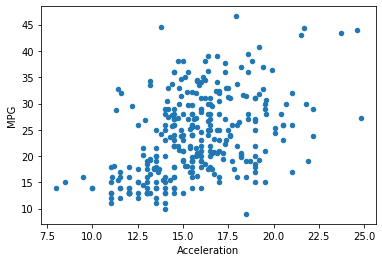

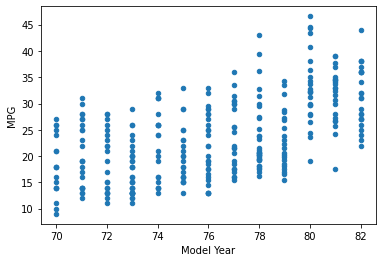

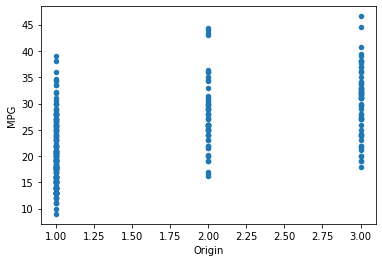

In [52]:
colname = train_val3.columns
for name in colname:
  train_val3.plot(kind = 'scatter',x = name,y = 'MPG')

In [54]:
col = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

train_val4 = train_val3[col]
train_val4.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
64,15.0,8,318.0,150.0,4135,13.5,72,1
55,27.0,4,97.0,60.0,1834,19.0,71,2
317,34.3,4,97.0,78.0,2188,15.8,80,2


In [55]:
train_val4.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.772369,-0.807965,-0.788586,-0.828652,0.462570,0.569262,0.582215
Cylinders,-0.772369,1.000000,0.950480,0.835923,0.892465,-0.505272,-0.333773,-0.567765
Displacement,-0.807965,0.950480,1.000000,0.894243,0.933676,-0.542653,-0.353566,-0.619901
Horsepower,-0.788586,0.835923,0.894243,1.000000,0.863366,-0.682464,-0.407420,-0.473434
Weight,-0.828652,0.892465,0.933676,0.863366,1.000000,-0.420461,-0.292003,-0.592483
Acceleration,0.462570,-0.505272,-0.542653,-0.682464,-0.420461,1.000000,0.309400,0.219888
Model Year,0.569262,-0.333773,-0.353566,-0.407420,-0.292003,0.309400,1.000000,0.183413
Origin,0.582215,-0.567765,-0.619901,-0.473434,-0.592483,0.219888,0.183413,1.000000


In [56]:
train_cor = train_val4.corr()['MPG']
train_cor

MPG             1.000000
Cylinders      -0.772369
Displacement   -0.807965
Horsepower     -0.788586
Weight         -0.828652
Acceleration    0.462570
Model Year      0.569262
Origin          0.582215
Name: MPG, dtype: float64

In [57]:
print(abs(1))
print(abs(-2))

1
2


In [58]:
se = pd.Series([1,-2,3,-4])

se.map(abs)

0    1
1    2
2    3
3    4
dtype: int64

In [60]:
abs_cor = train_cor.map(abs)
abs_cor

MPG             1.000000
Cylinders       0.772369
Displacement    0.807965
Horsepower      0.788586
Weight          0.828652
Acceleration    0.462570
Model Year      0.569262
Origin          0.582215
Name: MPG, dtype: float64

In [61]:
abs_cor.sort_values(ascending = False)

MPG             1.000000
Weight          0.828652
Displacement    0.807965
Horsepower      0.788586
Cylinders       0.772369
Origin          0.582215
Model Year      0.569262
Acceleration    0.462570
Name: MPG, dtype: float64

以下　Weight


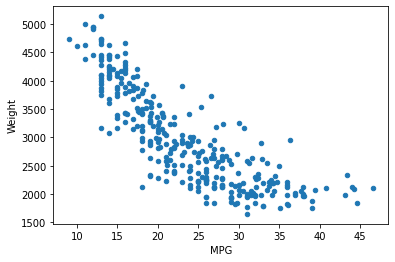

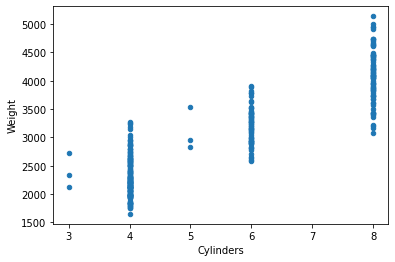

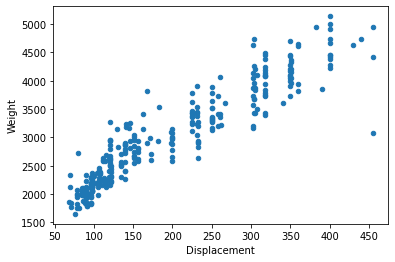

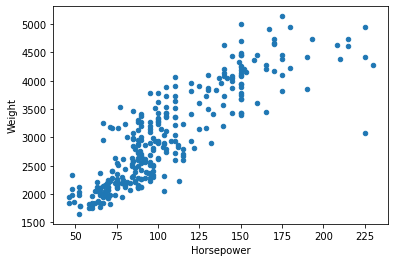

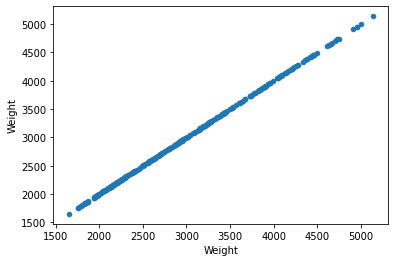

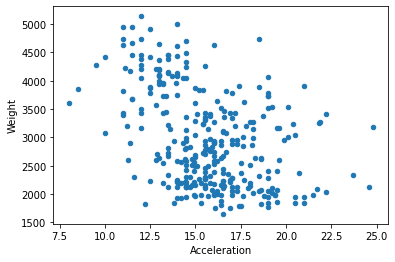

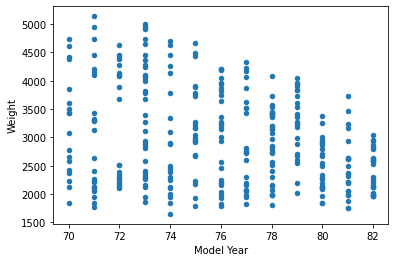

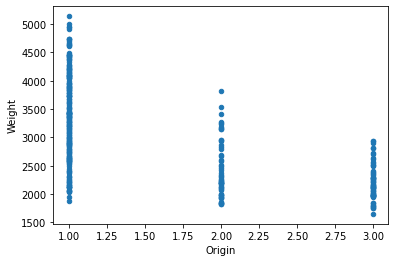

In [63]:
colname = train_val4.columns
for name in colname:
  train_val4.plot(kind = 'scatter',x = name,y = 'Weight')

In [64]:
out_line2 = train_val4[(train_val4['Weight'] > 2500) &
                       (train_val4['Horsepower'] > 220)].index
print(out_line2)

Int64Index([8, 116, 13, 95], dtype='int64')


In [66]:
train_val5 =train_val4.drop([8,116,13,95],axis = 0)

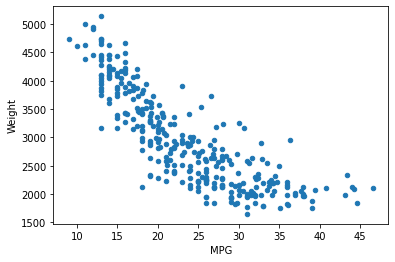

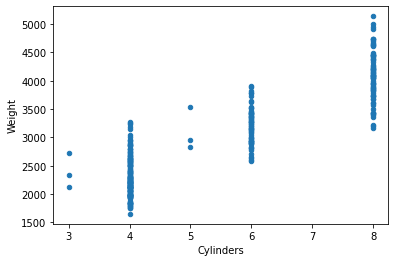

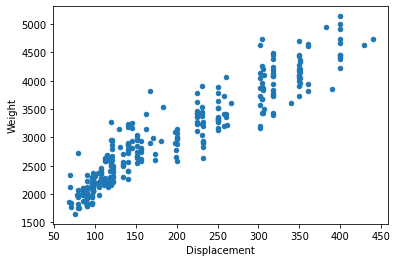

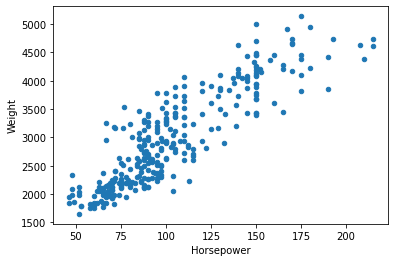

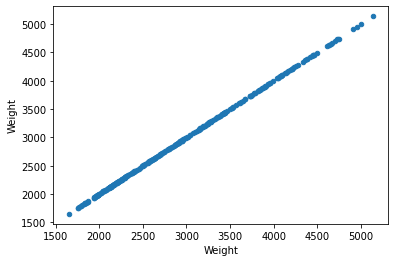

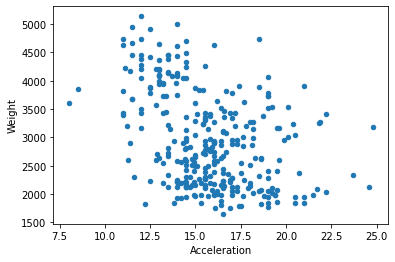

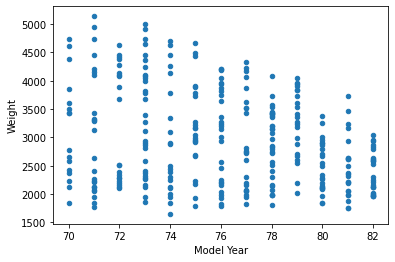

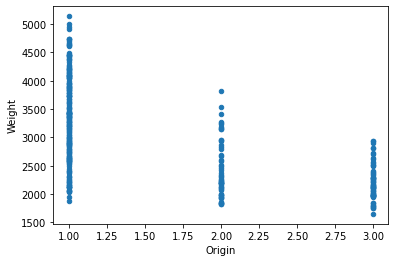

In [68]:
colname = train_val5.columns
for name in colname:
  train_val5.plot(kind = 'scatter',x = name,y = 'Weight')

In [69]:
train_cor = train_val5.corr()['Weight']
train_cor

MPG            -0.827927
Cylinders       0.893205
Displacement    0.941471
Horsepower      0.879732
Weight          1.000000
Acceleration   -0.401561
Model Year     -0.279206
Origin         -0.591334
Name: Weight, dtype: float64

In [70]:
print(abs(1))
print(abs(-2))

1
2


In [71]:
se = pd.Series([1,-2,3,-4])

se.map(abs)

0    1
1    2
2    3
3    4
dtype: int64

In [72]:
abs_cor = train_cor.map(abs)
abs_cor

MPG             0.827927
Cylinders       0.893205
Displacement    0.941471
Horsepower      0.879732
Weight          1.000000
Acceleration    0.401561
Model Year      0.279206
Origin          0.591334
Name: Weight, dtype: float64

In [73]:
abs_cor.sort_values(ascending = False)

Weight          1.000000
Displacement    0.941471
Cylinders       0.893205
Horsepower      0.879732
MPG             0.827927
Origin          0.591334
Acceleration    0.401561
Model Year      0.279206
Name: Weight, dtype: float64